# Artificial Neural Networks
#### Power Plant

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Part 1 - Data Preprocessing

### Data Loading

In [3]:
PATH = "../../../Deep_Learning/ANN/Python/Folds5x2_pp.xlsx"

In [4]:
dataset = pd.read_excel(PATH)

In [5]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
X_train = scX.fit_transform(X_train)
X_test = scX.transform(X_test)

scy = StandardScaler()
y_train = scy.fit_transform(y_train)
y_test = scy.transform(y_test)

## Part 2 - Model Building

In [9]:
print(X_train.shape)

(7654, 4)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

ann = Sequential()
ann.add(Dense(6, activation='relu', input_shape=(4, )))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(1, activation=None))

ann.compile(optimizer='adam', loss='mean_squared_error')

## Part 3 - Model Training

In [11]:
epochs = 100
batch_size = 32
ann.fit(X_train, y_train, batch_size=batch_size , epochs=epochs)

Train on 7654 samples
Epoch 1/100
7654/7654 [==============================] - 1s 90us/sample - loss: 0.3632
Epoch 2/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.1004
Epoch 3/100
7654/7654 [==============================] - 0s 50us/sample - loss: 0.0770
Epoch 4/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0706
Epoch 5/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0675
Epoch 6/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0657
Epoch 7/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0645
Epoch 8/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0636
Epoch 9/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0631
Epoch 10/100
7654/7654 [==============================] - 0s 49us/sample - loss: 0.0629
Epoch 11/100
7654/7654 [==============================] - 0s 48us/sample - loss: 0.0626
Epoch 12/100
7654/7

## Part 4 - Model Evaluation

### History

In [12]:
history = ann.history.history
loss = history['loss']

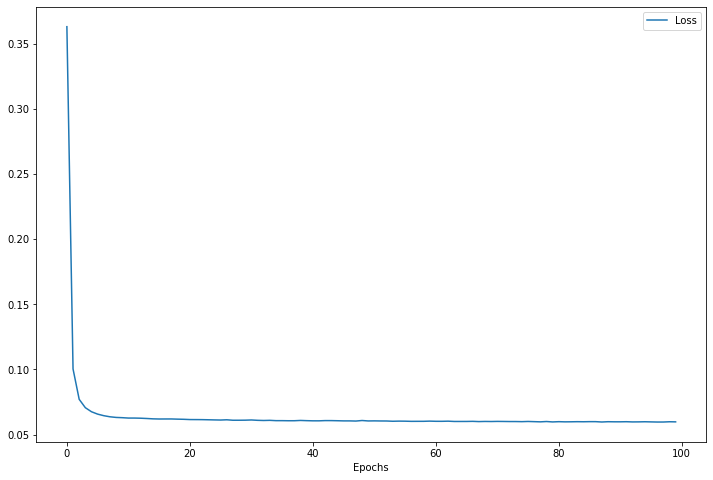

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(loss, label='Loss')
plt.legend()
plt.xlabel('Epochs')
plt.show()

### Prediction

In [14]:
sample = [[14.96, 41.76, 1024.07, 73.17]]

sample = np.array(sample)
sample = scX.transform(sample)
print(scy.inverse_transform(ann.predict(sample)))

[[464.36853]]


In [15]:
np.set_printoptions(2)
y_test = scy.inverse_transform(y_test)
y_pred = scy.inverse_transform(ann.predict(X_test))
print(np.concatenate((y_test.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)), axis=1))

[[455.27 456.12]
 [436.31 438.28]
 [440.68 434.91]
 ...
 [479.53 483.39]
 [435.76 435.63]
 [457.1  455.29]]
